### Libraries

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from plotly.subplots import make_subplots

### Upload Dataset

In [29]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '01_raw','spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

Logistic regression model to predict whether a song is "popular"

In [30]:
# Clear the data (remove rows with null values)
spotify.dropna(inplace=True)

# Define a dependent variable (example: popularity > 50)
spotify['popular'] = (spotify['popularity'] > 50).astype(int)

# Select the independent variables (numeric data only)
X = spotify[['danceability', 'energy', 'key', 'loudness', 
              'mode', 'speechiness', 'acousticness', 'instrumentalness', 
              'liveness', 'valence', 'tempo', 'time_signature']]

#Define the dependent variable
y = spotify['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create and train the model
model = LogisticRegression(max_iter=2000) # Increase to 2000 iterations
model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = model.predict(X_test_scaled)

#Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17158     0]
 [ 5602     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     17158
           1       0.00      0.00      0.00      5602

    accuracy                           0.75     22760
   macro avg       0.38      0.50      0.43     22760
weighted avg       0.57      0.75      0.65     22760



C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

### Linear Regression

In [ ]:
INSERTAR GRÁFICO AQUÍ

### Logistic Regression

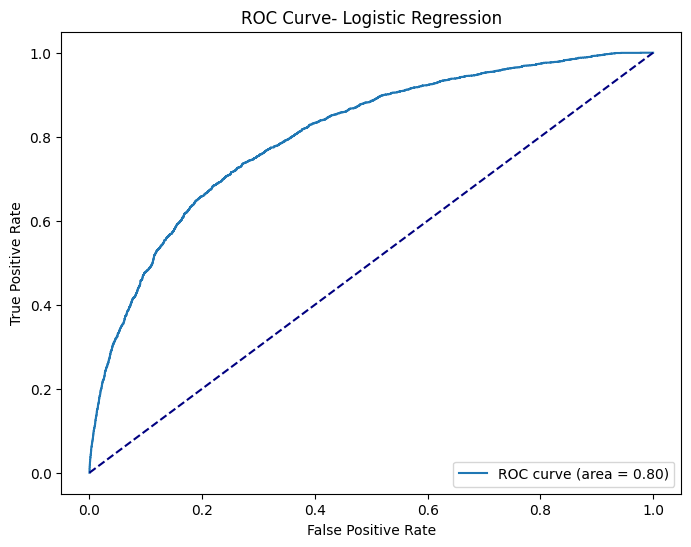

In [22]:
#Preprocessing: Selection of relevant numerical variables
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

#Target and predictor variables
X = spotify[features]
y = spotify['explicit'].astype(int) # We convert the 'explicit' variable into binary (0 or 1)

#Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Logistic regression model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predictions
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

#ROC Curve Generation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#Graph Generation
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Regression')
plt.legend(loc="lower right")
plt.show()